Review of Statistics

- For two continous random variables we use Pearson Correlation Coefficient
- It is essentially the covariance of two variables divided by the product of their standard deviations
- The value of the Pearson Correlation Coefficient is between -1 and 1
- cov(X, Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]
- eg, house prices and square footage


In [1]:
import numpy as np
from scipy.stats import pearsonr

y_true = np.array([3.0, 2.5, 4.0, 5.0])
y_pred = np.array([2.8, 2.7, 3.9, 5.1])

r, _ = pearsonr(y_true, y_pred)
print(f"Pearson correlation coefficient: {r:.3f}")

Pearson correlation coefficient: 0.987


Many discrete rvs are just labels, eg,rbg os 012, pearson r mistakes label codes for numeric meaning.

For one continous, and one discrete case we use the point-biserial correlation if discrete is binary(0/1)

Use ANOVA or box plots if discrete has more than two categories
- income vs gender


In [2]:
from scipy.stats import pointbiserialr

income = np.array([50000, 60000, 52000, 58000, 62000])
gender = np.array([0, 1, 0, 1, 1])

r, _ = pointbiserialr(gender, income)
print(f"Point-biserial r = {r:.2f}")


Point-biserial r = 0.95


For both discrete case, pearson is not ideal. We instead use spearman rank correlation or cramer's v for categorical variables.

We usually use chi squared test of independent
Cramer's V is based on chi-squared

When dealing with one continous, one discrete, we use point-biserial correlation if discrete is binary (0/1).
Analysis of variance (ANOVA) or box plots are used if the discrete variable has more than two categories.


[watch on the test, watch the video on the dist by same guy](https://www.youtube.com/watch?v=NTHA9Qa81R8)

In [ ]:
import scipy.stats as stats
import pandas as pd

data = [[20,15], [30,35]]
df = pd.DataFrame(data, columns=['Likes A', 'Likes B'], index=['Male', 'Female'])

chi2, p, dof, expected = stats.chi2_contingency(df)

print(f"Chi-squared statistic = {chi2}")
print(f"p-value = {p}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies:")
print(expected)

# based on teh chi2 value you can decide to reject or accept hte null hypothesis

Chi-squared statistic = 0.7032967032967032
p-value = 0.4016781664697727
Degrees of freedom = 1
Expected frequencies:
[[17.5 17.5]
 [32.5 32.5]]


In [4]:
# goodness of fit test
import scipy.stats as stats

# Observed frequencies for die faces 1-6
observed = [10, 8, 9, 11, 12, 10]

expected = [10] * 6 

chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-squared statistic = {chi2}")
print(f"p-value = {p}")


Chi-squared statistic = 1.0
p-value = 0.9625657732472964


if p<0.05 -> reject the null hypothesis, variables are not independent, observed is not equal to the expected

if p>=0.05 -> fail to reject the null, no significant difference, data fits expected

Anova is an extension of the t-test, when you have more than two groups

[t test](https://www.youtube.com/watch?v=VekJxtk4BYM)

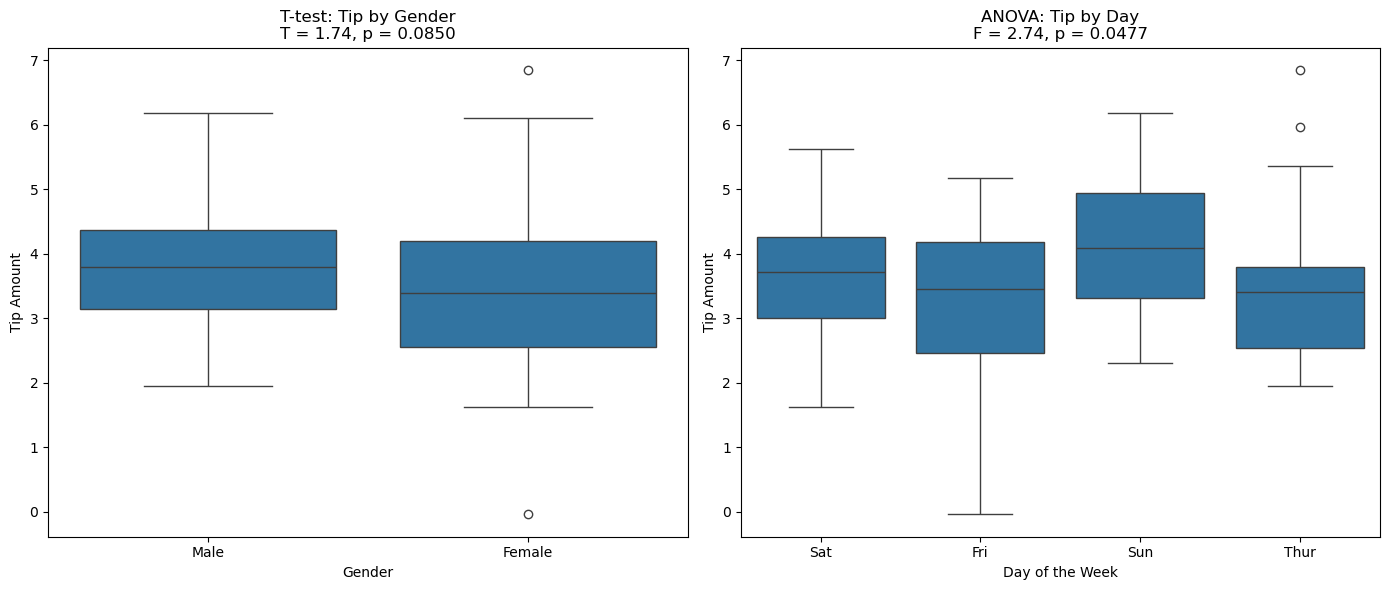

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)

n = 100
data = pd.DataFrame({
    "sex": np.random.choice(["Male", "Female"], size=n),
    "day": np.random.choice(["Thur", "Fri", "Sat", "Sun"], size=n),
})

# Tip depends slightly on gender and day
data["tip"] = (
    np.where(data["sex"] == "Male", np.random.normal(3.5, 1.0, size=n), np.random.normal(3.0, 1.0, size=n)) +
    data["day"].map({"Thur": 0.0, "Fri": 0.2, "Sat": 0.5, "Sun": 0.8})
)

# T-test between Male and Female
male_tips = data[data["sex"] == "Male"]["tip"]
female_tips = data[data["sex"] == "Female"]["tip"]
t_stat, t_p = stats.ttest_ind(male_tips, female_tips, equal_var=False)

# ANOVA for tip across days
anova_groups = [g["tip"].values for _, g in data.groupby("day")]
f_stat, f_p = stats.f_oneway(*anova_groups)

# Plotting
plt.figure(figsize=(14, 6))

# t-test plot
plt.subplot(1, 2, 1)
sns.boxplot(x="sex", y="tip", data=data)
plt.title(f"T-test: Tip by Gender\nT = {t_stat:.2f}, p = {t_p:.4f}")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")

# ANOVA plot
plt.subplot(1, 2, 2)
sns.boxplot(x="day", y="tip", data=data)
plt.title(f"ANOVA: Tip by Day\nF = {f_stat:.2f}, p = {f_p:.4f}")
plt.xlabel("Day of the Week")
plt.ylabel("Tip Amount")

plt.tight_layout()
plt.show()




t-test:
t = 0.3351, p = 0.7387


In [ ]:
If p<0.05, significant difference, tests if average tips differ between males and females

anoka(day): test if day of the week affects tip amounds, again if p < 0.05 means at least one day differs in average tip

## Hypothesis testing

- It is a statistical methods to make decisions about a population based on sample data
- We want to device if there is enough evidence to reject the null hypothesis about teh population
- Null Hypothesis (H0): There is no effect or difference
- Alternative Hypothesis (H1): There is an effect or difference
- Significance Level (α): The probability of rejecting the null hypothesis when it is true, commonly set at 0.05
- p-value: Probability of obtaining results at least as extreme as observed, assuming the null hypothesis is true
- If p-value < α, reject the null hypothesis (H0)
- If p-value ≥ α, fail to reject the null hypothesis (H0)
- Test Statistic: A value like z or t, that measures difference between sample and null

### Tests

- Z-test: known variance, large sample size (n > 30)
- t-test: unknown variance, small sample size (n < 30)
- Chi-sqaured test: categorical data
- ANOVA: compares more than 2 group means
- Correlation test (pearson) : checking relationship between two continous variables


One sample t-test:
- used for continuous data
- you can one group and data is continuous eg weight, height, scores etc.
- compare the sample mean to known/hypothesized mean
- population standard deviation is unknown
- sample size is moderate or small

- CLT tells us that xbar is approximately normal for large n, but when sigma is unknown adn replaced by s, the uncertainty increases
- t-distributiona ccounds for this extra varaibility, it has heavier tails 

- The assumption is htat data are from normal distribution, which is continous

T-statistic: 1.065, p-value: 0.300


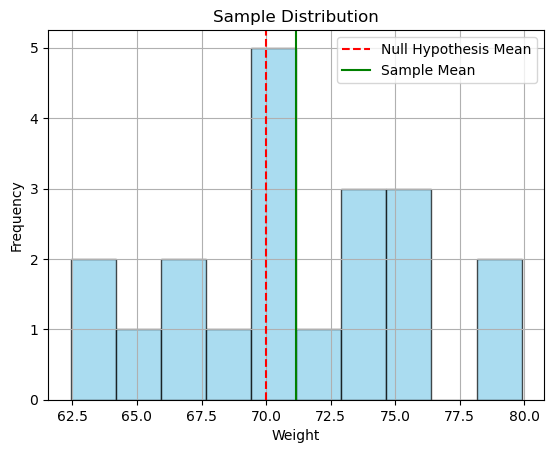

In [ ]:
# test whether the mean weigth of people is 70kg, we have a sample of 20 peoples weights
# df = n - 1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


np.random.seed(42)
sample = np.random.normal(loc=72, scale=5, size=20)  # mean=72, std=5

# Hypotheses
# H₀: μ = 70
# H₁: μ ≠ 70

# One-sample t-test
t_stat, p_val = stats.ttest_1samp(sample, popmean=70)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

# Visualization
plt.hist(sample, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=70, color='red', linestyle='--', label='Null Hypothesis Mean')
plt.axvline(x=sample.mean(), color='green', linestyle='-', label='Sample Mean')
plt.title('Sample Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Two-sample t-Test(independent samples):
- compare whether two independent groups have significantly different means
- used when two indepenet groups
- continuous data
- compare the means of the two groups
- standard deviations may or may not be equal

T-statistic: 1.702, p-value: 0.094


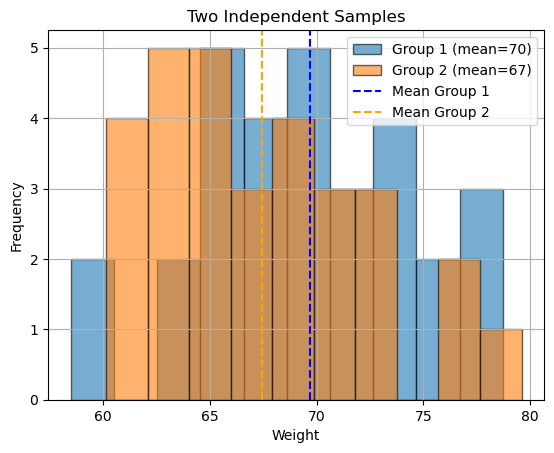

In [12]:
# eg. compare male and female weights

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(1)
group1 = np.random.normal(loc=70, scale=5, size=30)  # e.g., male weights
group2 = np.random.normal(loc=67, scale=6, size=30)  # e.g., female weights

# Welch's t-test (assume unequal variances by default)
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

plt.hist(group1, bins=10, alpha=0.6, label="Group 1 (mean=70)", edgecolor='black')
plt.hist(group2, bins=10, alpha=0.6, label="Group 2 (mean=67)", edgecolor='black')
plt.axvline(x=group1.mean(), color='blue', linestyle='--', label='Mean Group 1')
plt.axvline(x=group2.mean(), color='orange', linestyle='--', label='Mean Group 2')
plt.title("Two Independent Samples")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

[t distribution video](https://www.youtube.com/watch?v=UetYS3PaHIo)


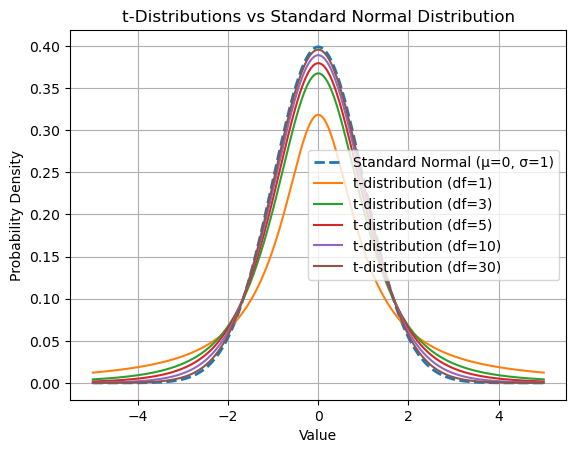

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# x-axis values
x = np.linspace(-5, 5, 500)

# Plot standard normal distribution
plt.plot(x, norm.pdf(x), label='Standard Normal (μ=0, σ=1)', linewidth=2, linestyle='--')

# Plot t-distributions with different degrees of freedom
dfs = [1, 3, 5, 10, 30]
for df in dfs:
    plt.plot(x, t.pdf(x, df), label=f"t-distribution (df={df})")

plt.title("t-Distributions vs Standard Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
#  notice how the lesser degrees of freedom, heavier the tails and lesser pd around the mean

T-statistic: -3.391041, p-value: 0.003


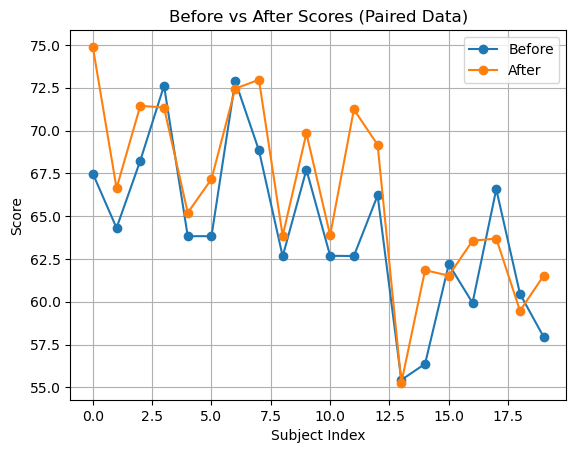

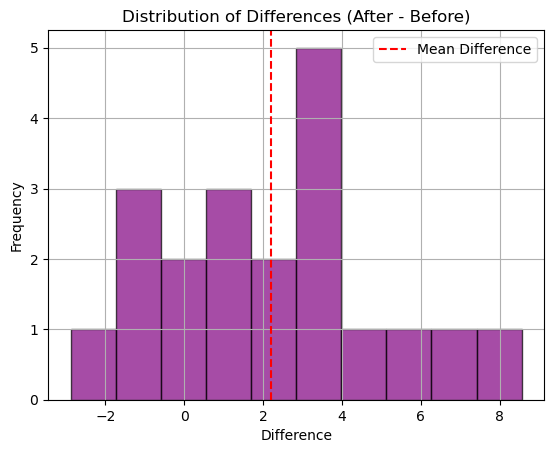

In [ ]:
# Paired t-test
# test whether hte mean difference between two related samples is significantly different from zero
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)
before = np.random.normal(loc=65, scale=5, size=20)
after = before + np.random.normal(loc=3, scale=3, size=20) # improvement on average 

diff = after - before
t_stat, p_val = stats.ttest_rel(before, after)
print(f"T-statistic: {t_stat:3f}, p-value: {p_val:.3f}")

plt.plot(range(len(before)), before, label="Before", marker='o')
plt.plot(range(len(after)), after, label="After", marker='o')
plt.title("Before vs After Scores (Paired Data)")
plt.xlabel("Subject Index")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of the differences
plt.hist(diff, bins=10, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(np.mean(diff), color='red', linestyle='--', label='Mean Difference')
plt.title("Distribution of Differences (After - Before)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# since p-valie is less than 0.05 we reject the null hypothesis there is a significant difference between the two related samples

# paired t-test: same subjects, they are not independent
# two-sample t-test: independent subjects, two different groups


p=0.05 this is an inferential statistic that if I were to repeat the experiement 100 times, we reject the null hypothesis 5 times. So we are 95% confident that the null hypothesis is true.

Chi-squared test for goodness of fit:
- tests if a categorical variable matches a theoretical distribution
Chi-Squared test for independence:
- tests if two categorical variables are associated or independent

One-way ANOVA:
- one categorical independent variable
- one continuous dependent variable
- test if group means are all equal or not

Let the groups G1, .. Gk each with mean μ1, .. μk and variance σ^2
- Null Hypothesis (H0): μ1 = μ2 = ... = μk (all group means are equal)
- Alternative Hypothesis (H1): At least one group mean is different

Formula (F-statistic):
F = Variance between groups / Variance within groups

Where:
- Variance between groups measures how much the group means differ from the overall mean
- Variance within groups measures how much the individual observations differ from their respective group means
- If F is large, it suggests that the group means are not all equal
- If F is small, it suggests that the group means are similar

The follows the F-distribution with (k-1, N-k) degrees of freedom, where k is the number of groups and N is the total number of observations.

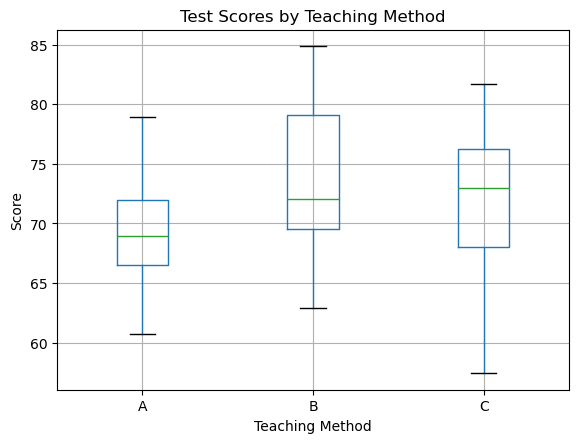

F-statistic: 4.524
P-value: 0.0135


In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(3)


group1 = np.random.normal(70, 5, 30)
group2 = np.random.normal(75, 5, 30)
group3 = np.random.normal(72, 5, 30)

data = pd.DataFrame({
    'Score': np.concatenate([group1, group2, group3]),
    'Method': ['A']*30 + ['B']*30 + ['C']*30
})

# Grouped boxplot
data.boxplot(by='Method', column='Score', grid=False)
plt.title("Test Scores by Teaching Method")
plt.suptitle("")
plt.xlabel("Teaching Method")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# One-way ANOVA
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")


alpha(α) is the significance level, typically set at 0.05
- it is the probability of rejecting the null hypothesis when it is true
- it is P(Type I error)
- [hypothesis testing video](https://www.youtube.com/watch?v=8JIe_cz6qGA)
- [p value intuition](https://www.youtube.com/watch?v=4XfTpkGe1Kc)